In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [3]:
#Loading file into Path
data = Path('clean_data.csv')
#Reading data file
data_df = pd.read_csv(data)
data_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


# Hypothesis 1: There is a correlation between Smoking status and Prevalent CHD 

In [4]:
#Filter Data for Period 1 
period_1_data = data_df.loc[data_df['PERIOD']==1, :]

In [5]:
#Grouping Data into Smoking Status and Prevalent CHD 
period_1_data_gb = period_1_data.groupby(['SMOKING STATUS', 'PREVALENT CHD']).count()
#Keeping the count of smoking status prevalent CHD cases 
period_1_data_gb = pd.DataFrame(period_1_data_gb['ID'])
# Reset the index to make the groupby columns regular columns
period_1_data_gb = period_1_data_gb.reset_index()
# Pivot the DataFrame to create a more readable table for plotting
pivot_table_1 = period_1_data_gb.pivot(index='SMOKING STATUS', columns='PREVALENT CHD', values='ID')
pivot_table_1

PREVALENT CHD,NO,YES
SMOKING STATUS,,
NO,1415,40
YES,1275,24


[Text(0, 0, 'Non Smoker'), Text(1, 0, 'Smoker')]

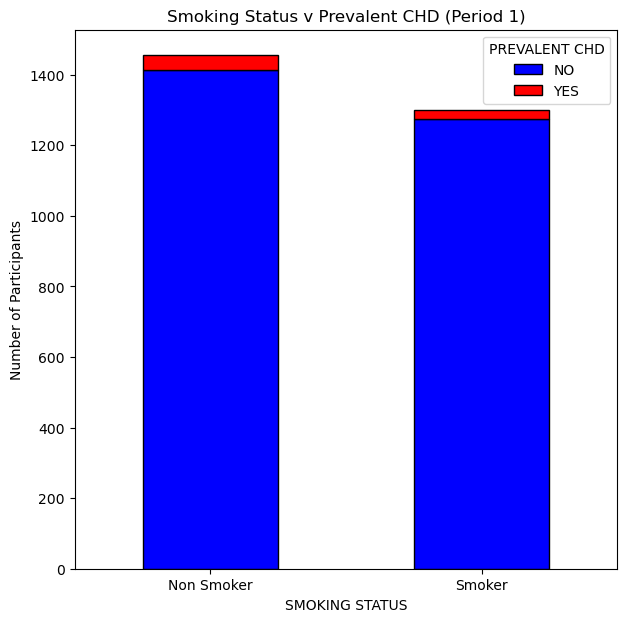

In [6]:
#List of xtick labels 
xtick_labels = ['Non Smoker', 'Smoker']

period_1_plot = pivot_table_1.plot.bar(stacked=True, figsize = (7,7), ylabel = "Number of Participants", 
                                       title = "Smoking Status v Prevalent CHD (Period 1)", color = ['blue', 'red'],
                                       edgecolor = 'black', rot = 0
                                       )

period_1_plot.set_xticklabels(xtick_labels)

# Chi-Squared Test (Period 1 Data)

In [7]:
#Df of Observed Vlaues 
expected_values = period_1_data_gb.copy()
#Creating a Df of expected value 
rows_sum = pivot_table_1.sum(axis=1)
colums_sum = pivot_table_1.sum(axis=0)

#Calculating the expected values
expected_values.loc[0, 'ID'] = (rows_sum[0]*colums_sum[0])/(sum(rows_sum))
expected_values.loc[1, 'ID'] = (rows_sum[0]*colums_sum[1])/(sum(rows_sum))
expected_values.loc[2, 'ID'] = (rows_sum[1]*colums_sum[0])/(sum(rows_sum))
expected_values.loc[3, 'ID'] = (rows_sum[1]*colums_sum[1])/(sum(rows_sum))
expected_values

#Creating a table with the Observed and Expected values 
chi_square_table = pd.DataFrame()
chi_square_table['Observed'] = period_1_data_gb['ID']
chi_square_table['Expected'] = expected_values['ID']
chi_square_table


,Observed,Expected
0,1415,1421.187364
1,40,33.812636
2,1275,1268.812636
3,24,30.187364


In [8]:
#Determing the critical vlaue 
critical_value = st.chi2.ppf(q = 0.95, df = 1)
print(f"This is the critical value {critical_value}")

This is the critical value 3.841458820694124


In [9]:
# Run the chi square test with stats.chisquare()
st.chisquare(chi_square_table['Observed'], chi_square_table['Expected'])

Power_divergenceResult(statistic=2.4575293790579784, pvalue=0.483015392747033)

# Conclusion 

Since the chi square value of 2.46 does not exceed the critical value of 7.81, we conclude that the results are statistically not significant.

In [10]:
#Filter Data for Period 3
period_3_data = data_df.loc[data_df['PERIOD']==3, :]

In [11]:
#Grouping Data into Smoking Status and Prevalent CHD 
period_3_data_gb = period_3_data.groupby(['SMOKING STATUS', 'PREVALENT CHD']).count()
#Keeping the count of smoking status prevalent CHD cases 
period_3_data_gb = pd.DataFrame(period_3_data_gb['ID'])
# Reset the index to make the groupby columns regular columns
period_3_data_gb = period_3_data_gb.reset_index()
# Pivot the DataFrame to create a more readable table for plotting
pivot_table_2 = period_3_data_gb.pivot(index='SMOKING STATUS', columns='PREVALENT CHD', values='ID')
pivot_table_2

PREVALENT CHD,NO,YES
SMOKING STATUS,,
NO,1601,219
YES,853,81


[Text(0, 0, 'Non Smoker'), Text(1, 0, 'Smoker')]

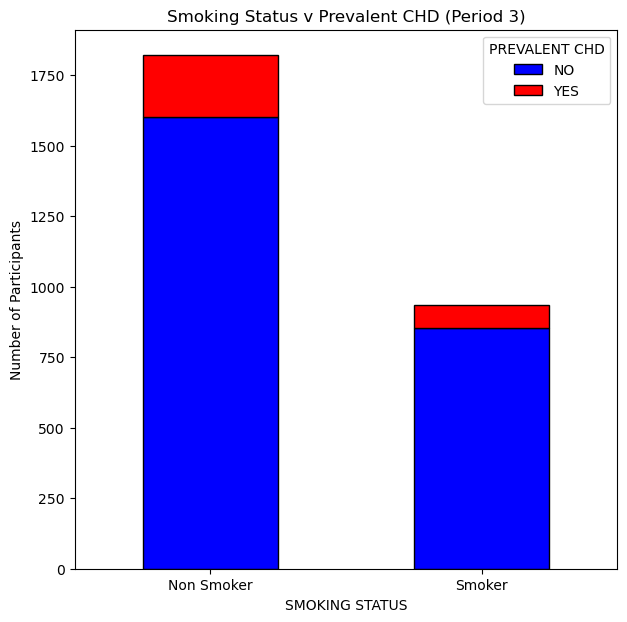

In [12]:
period_3_plot = pivot_table_2.plot.bar(stacked=True, figsize = (7,7), ylabel = "Number of Participants", 
                                       title = "Smoking Status v Prevalent CHD (Period 3)", color = ['blue', 'red'],
                                       edgecolor = 'black', rot = 0
                                       )
period_3_plot.set_xticklabels(xtick_labels)

# Chi-Squared Test (Period 3 Data)

In [13]:
#Df of Observed Vlaues 
expected_values = period_3_data_gb.copy()
#Creating a Df of expected value 
rows_sum = pivot_table_2.sum(axis=1)
colums_sum = pivot_table_2.sum(axis=0)

#Calculating the expected values
expected_values.loc[0, 'ID'] = (rows_sum[0]*colums_sum[0])/(sum(rows_sum))
expected_values.loc[1, 'ID'] = (rows_sum[0]*colums_sum[1])/(sum(rows_sum))
expected_values.loc[2, 'ID'] = (rows_sum[1]*colums_sum[0])/(sum(rows_sum))
expected_values.loc[3, 'ID'] = (rows_sum[1]*colums_sum[1])/(sum(rows_sum))
expected_values

#Creating a table with the Observed and Expected values 
chi_square_table = pd.DataFrame()
chi_square_table['Observed'] = period_3_data_gb['ID']
chi_square_table['Expected'] = expected_values['ID']
chi_square_table

,Observed,Expected
0,1601,1621.742919
1,219,198.257081
2,853,832.257081
3,81,101.742919


In [14]:
#Determing the critical vlaue 
critical_value = st.chi2.ppf(q = 0.95, df = 1)
print(f"This is the critical value {critical_value}")

This is the critical value 3.841458820694124


In [15]:
# Run the chi square test with stats.chisquare()
st.chisquare(chi_square_table['Observed'], chi_square_table['Expected'])

Power_divergenceResult(statistic=7.181538444105906, pvalue=0.06633119265465821)

# Conclusion 

Since the chi square value of 7.18 doesexceed the critical value of 7.81, we conclude that the results are statistically significant.

# Hypothesis 2: There is a correlation between Age, Smoking Status and Prevalent CHD 

In [23]:
#Filtering data to isolate data for period 1 data & Smoking Status
smoker_period_1_data = data_df.loc[(data_df['PERIOD']==1) & (data_df['SMOKING STATUS']=='YES')]
#Filtering data to isolate data for period 1 data & Smoking Status
smoker_period_3_data = data_df.loc[(data_df['PERIOD']==3) & (data_df['SMOKING STATUS']=='YES')]
smoker_period_1_data

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
9,16365,M,225.0,43,YES,30,1,NO,1,23.61
15,24721,F,226.0,39,YES,9,2,NO,1,22.35
18,33077,M,232.0,48,YES,10,3,NO,1,22.37
21,34689,F,195.0,38,YES,5,2,NO,1,23.24
27,40435,F,190.0,42,YES,30,2,NO,1,21.59
...,...,...,...,...,...,...,...,...,...,...
8223,9939850,F,230.0,56,YES,5,3,NO,1,24.71
8235,9961615,M,216.0,45,YES,43,4,NO,1,24.24
8247,9973350,F,251.0,51,YES,20,3,NO,1,25.60
8250,9978986,F,268.0,56,YES,3,1,NO,1,22.89


In [ ]:
# Create the bins for the age groups
bins = [25, 35, 45, 55, 65, 75, 85]

# Create the names labels
age_labels = ["25-35", "35-45", "45-55", "55-65", "65-75", "75-85"]